In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import seaborn as sns
# plt.style.use('ggplot')
sns.set_style('whitegrid')

%matplotlib inline

In [8]:
students = pd.read_csv("data/student/student-por.csv", delimiter=';')

In [9]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [11]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

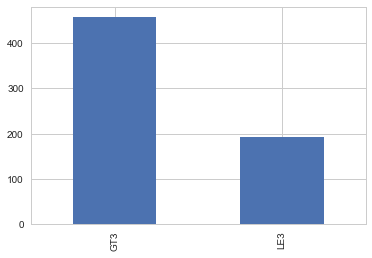

In [14]:
students["famsize"].value_counts().plot('bar')

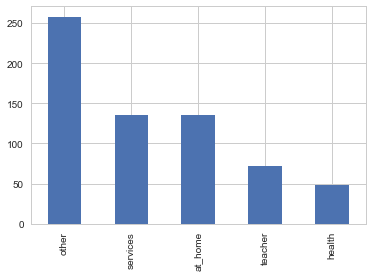

In [15]:
students["Mjob"].value_counts().plot('bar')

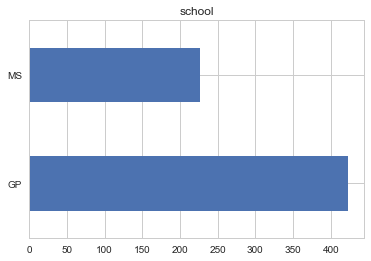

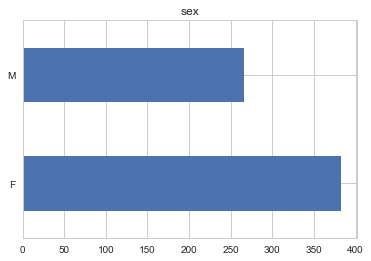

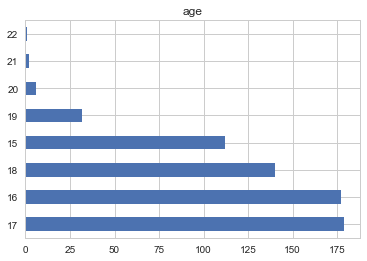

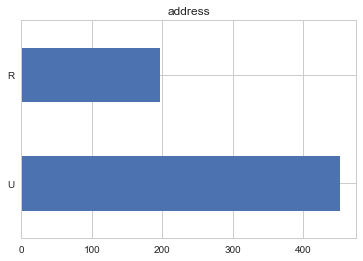

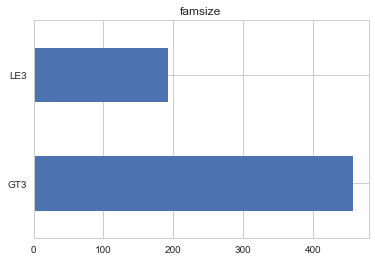

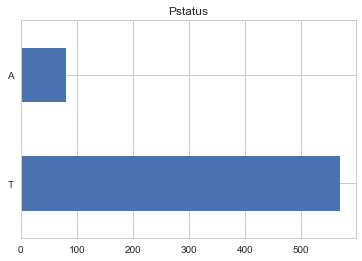

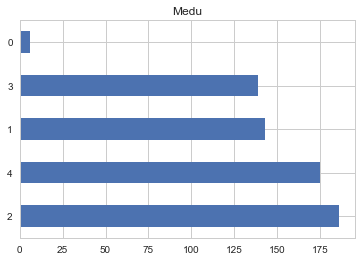

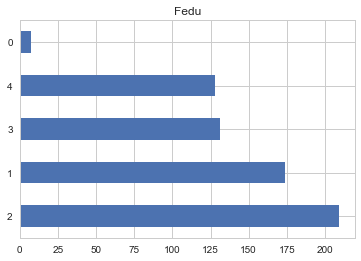

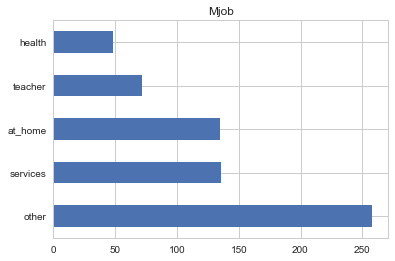

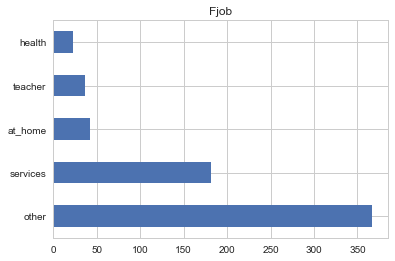

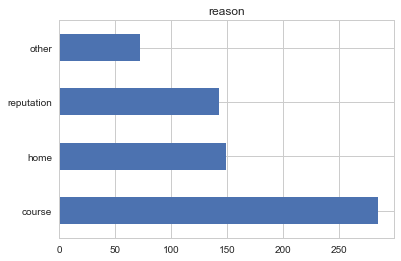

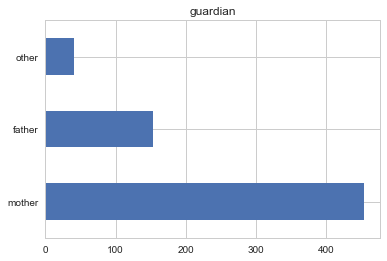

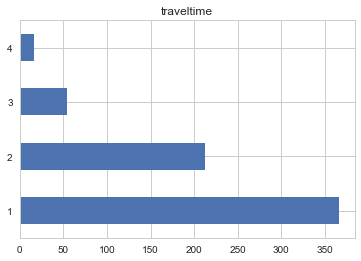

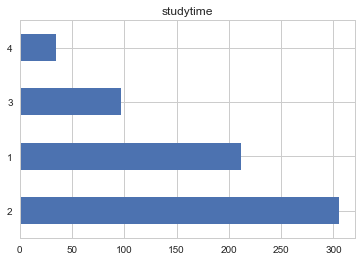

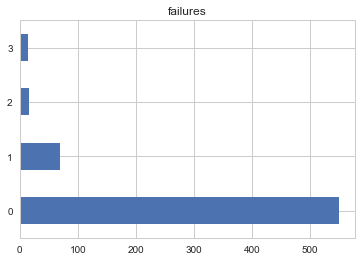

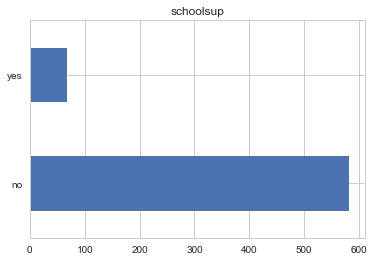

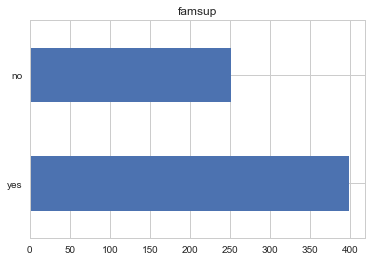

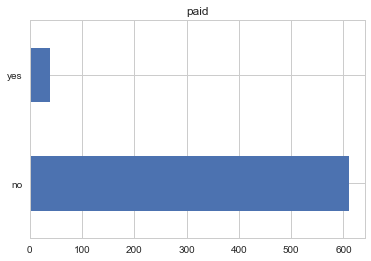

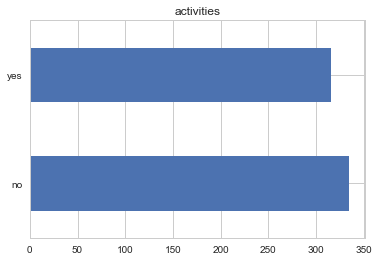

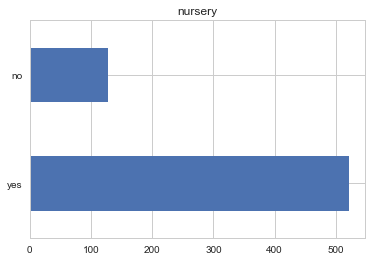

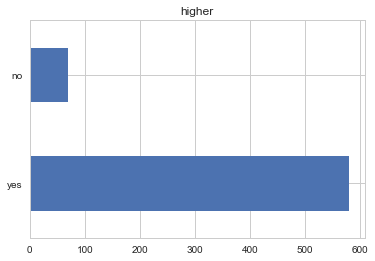

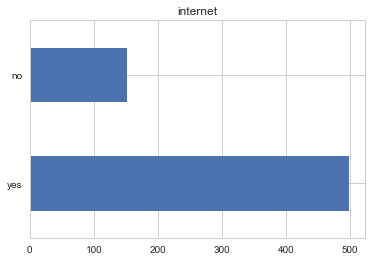

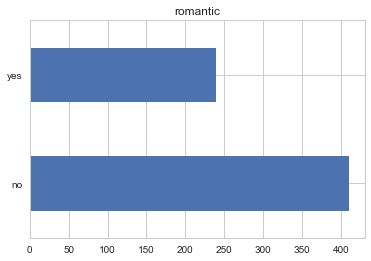

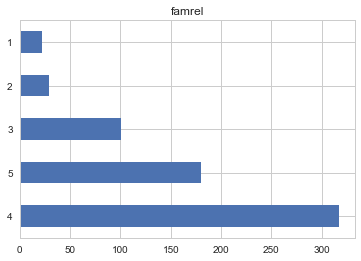

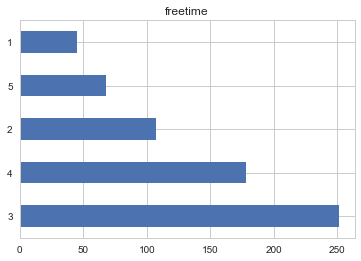

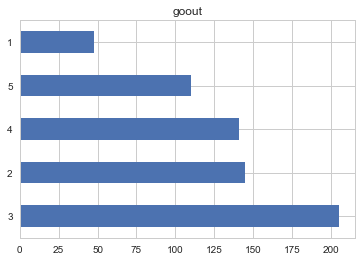

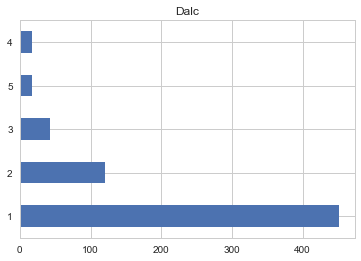

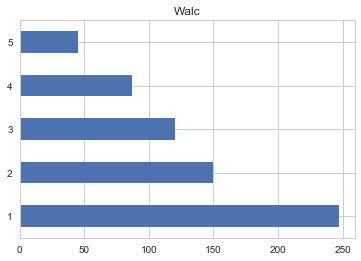

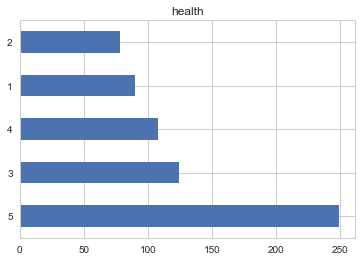

absences has more values than 10
G1 has more values than 10
G2 has more values than 10
G3 has more values than 10


In [18]:
for col in students.columns:
    counts = students[col].value_counts()
    if len(counts) <= 10:
        counts.plot('barh', title=col)
        plt.show()
    else:
        print(col, "has more values than 10")

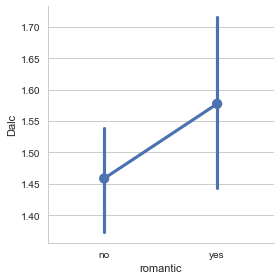

In [22]:
sns.factorplot(data=students, y='Dalc', x='romantic')

In [26]:
students['romantic'].dtype == 'O'

True

In [27]:
dummize = [col for col in students.columns if students[col].dtype == 'O']

In [28]:
students2 = pd.get_dummies(students, columns=dummize, drop_first=True)

In [29]:
students2.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [30]:
students2.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
# plt.style.use('ggplot')
sns.set_style('whitegrid')

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# to be moved somewhere else
from sklearn.linear_model import LogisticRegression

In [35]:
X = students2.drop('romantic_yes', axis='columns')
Y = students2['romantic_yes']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [40]:
1 - Y.mean()

0.63174114021571648

In [36]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
rf.score(X_train, Y_train)

1.0

In [38]:
rf.score(X_test, Y_test)

0.61963190184049077

In [41]:
logreg = LogisticRegression(C=10.)
logreg.fit(X_train, Y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
logreg.score(X_train, Y_train)

0.69341563786008231

In [43]:
logreg.score(X_test, Y_test)

0.57668711656441718

In [ ]:
# not good
# so maybe rather G1 + G2 + G3 or something

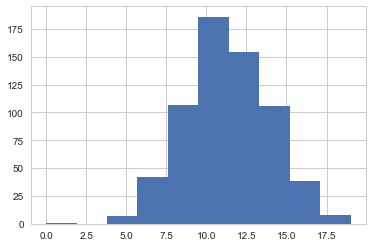

In [44]:
students2["G1"].hist()

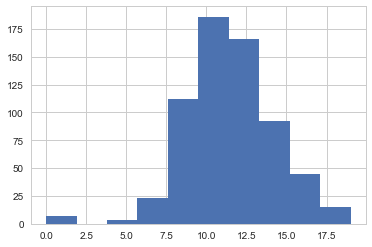

In [45]:
students2["G2"].hist()

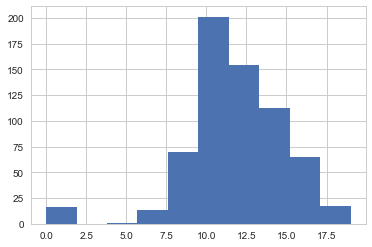

In [46]:
students2["G3"].hist()

In [52]:
students2["G"] = students2["G1"] + students2["G2"] + students2["G3"]
students2["good_G"] = students2["G"] > students2["G"].mean()

In [53]:
X = students2.drop(['G', 'good_G', 'G1', 'G2', 'G3'], axis='columns')
Y = students2['good_G']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [56]:
Y.mean()

0.50539291217257321

In [57]:
logreg = LogisticRegression(C=10.)
logreg.fit(X_train, Y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
logreg.score(X_train, Y_train)

0.80452674897119336

In [59]:
logreg.score(X_test, Y_test)

0.68098159509202449

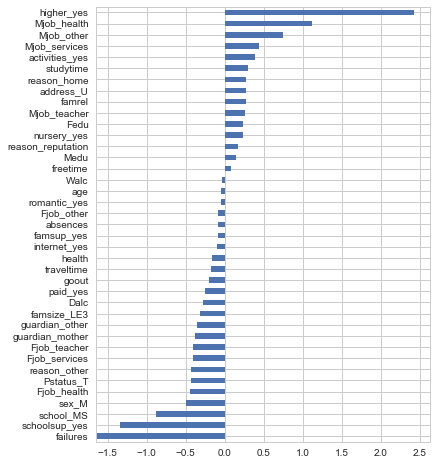

In [67]:
# danger - unweighted
pd.Series(logreg.coef_[0], index=X.columns).sort_values().plot('barh', figsize=(6, 8))

In [65]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [68]:
rf.score(X_train, Y_train)

1.0

In [69]:
rf.score(X_test, Y_test)

0.66257668711656437

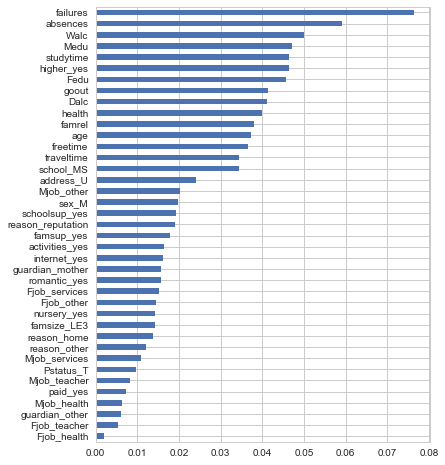

In [70]:
pd.Series(rf.feature_importances_, index=X.columns).sort_values().plot('barh', figsize=(6, 8))